# Predicting Spam Text Messages
## Author: Ahria Dominguez
### Last Updated: 6/30/2024

## Data Exploration

#### Introduction - Analysis Idea, Problem Addressed, and Model Target

For my data mining project, I want to see if there is a way to screen spam texts and block them before they arrive to a cell phone user. There are several “spam call and text blocker” apps available, and I believe those companies would greatly benefit from highly precise predictive/categorical models in order to best ensure that they are blocking the most spam texts possible while not blocking normal texts. Customer turnover would be extremely likely if their model is unsuccessful by not blocking enough spam messages or blocking too many ham (non-spam) messages. In order to avoid customer churn, a good model is critical, which is why I believe creating a good model is useful for these companies. 

The data I will be using comes from Kaggle (https://www.kaggle.com/datasets/team-ai/spam-text-message-classification), and I think it’s a great fit because it only holds two columns – category (spam or ham) and the text message. This shows that there hasn’t been much done to the dataset; there is a lot of freedom when choosing how to parse, analyze, and manipulate the data.

To begin the project, I’ll perform some graphical analysis by plotting different types of visualizations to get a sense of the composition of the data. These graphs will include bar graphs, histograms, pie charts, and word clouds. Bar graphs will be useful for displaying the frequency of things like the number of spam messages or how frequently a word is used within text messages, while histograms are great for displaying the distribution of the messages. Pie charts show how much of all the texts are spam or ham, and word clouds are a great way to display frequently used words in a pleasing format. 

Overall, my target is to be able to accurately detect spam messages from the text alone, without encountering too many false positives or false negatives.

#### Graphical Analysis with Graphs

In [1]:
# Imports the pandas package to import the .csv data.
import pandas as pd

In [2]:
# Loads the dataset into a data frame titled 'text_data' and prints the header to show it worked.
text_data = pd.read_csv("SPAM text message 20170820- Data.csv")
text_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Imports the matplotlib and package for the following graphs.
import matplotlib.pyplot as plt

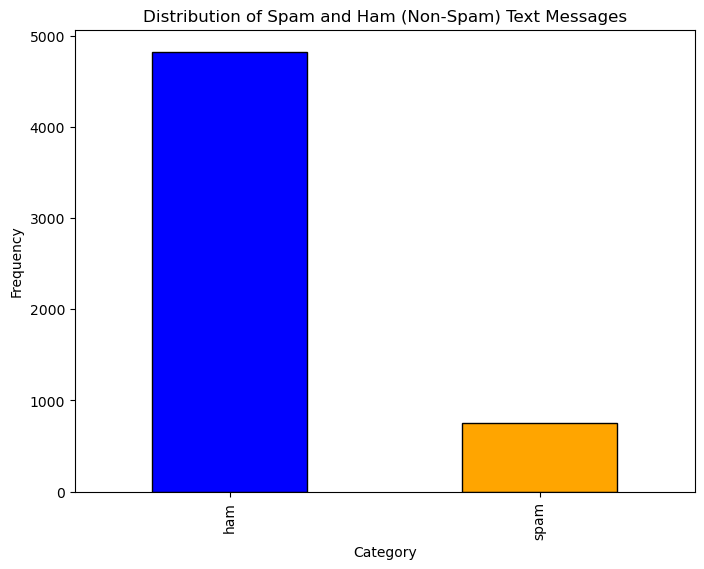

In [4]:
# Creates a variable 'category_counts' that includes the amount of 'spam' and 'ham' instances there are.
category_counts = text_data['Category'].value_counts()

# Plots a bar graph of the frequencies of spam and ham texts.
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color=['blue', 'orange'], edgecolor='black')
plt.title('Distribution of Spam and Ham (Non-Spam) Text Messages')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.savefig('bar_plot.png')
plt.show()

It appears that non-spam messages are much more frequent in the dataset (about 4800 ham and about 800 spam just by observing the graph). This will need to be remembered when splitting the data into training and testing sets.

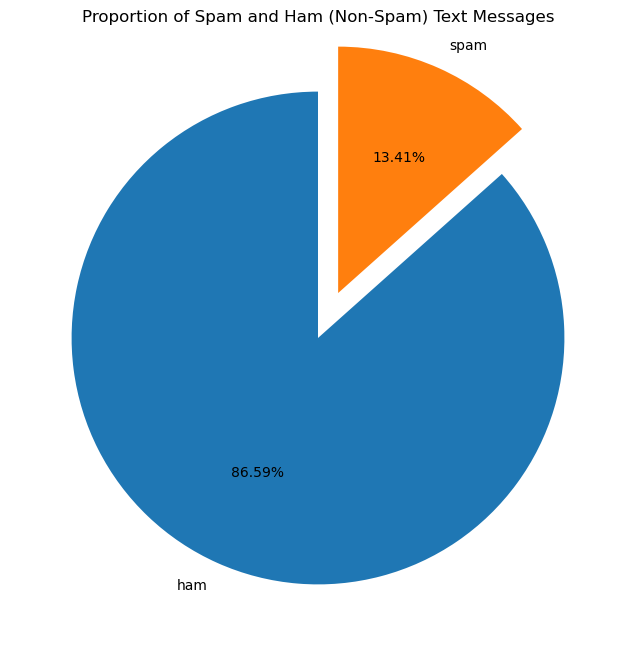

In [5]:
# Creates a variable that will tell the pie chart code to make a wedge stand out. 
my_explode = [0, 0.2]

# Plots the pie chart and includes the percentages and explode function.
plt.figure(figsize=(8, 8)) # Makes the figure bigger than it originally was.
plt.pie(category_counts, labels=['ham', 'spam'], startangle=90, autopct='%.2f%%', explode=my_explode)
plt.title('Proportion of Spam and Ham (Non-Spam) Text Messages')
plt.savefig('pie_chart.png')
plt.show()

Again, this is a good way to show that ham messages make up a large majority of the dataset. My analysis is based on being able to correctly identify about 13% of text messages that come into a users phone, so there are a lot of messages that need to pass through.

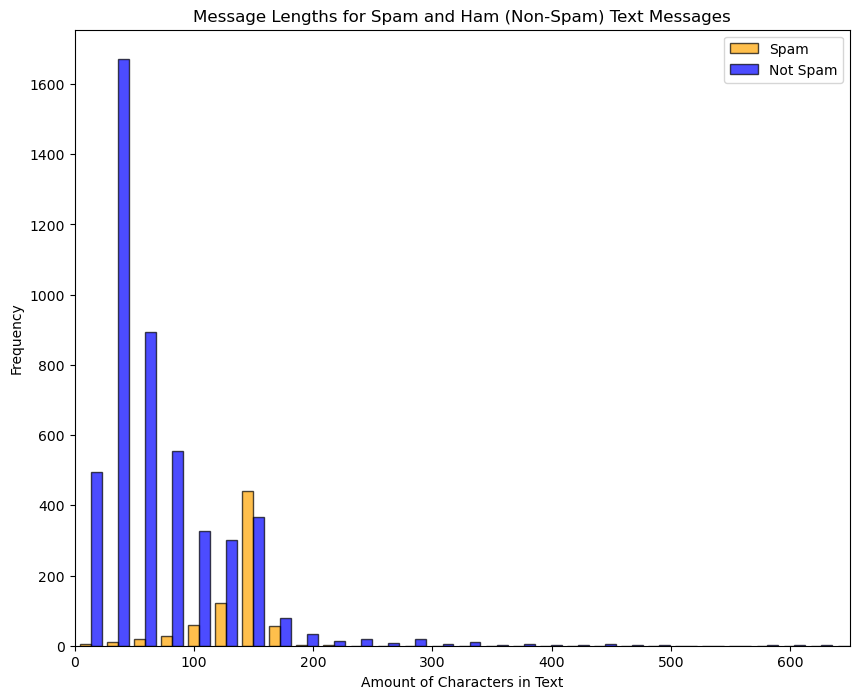

In [6]:
# Assigns the length of the texts (or amount of characters) to a new column in the data frame.
text_data['text_length'] = text_data['Message'].apply(len)

# Plots the length of text for both spam and ham categorical types as a histogram.
plt.figure(figsize=(10, 8))
plt.hist([text_data[text_data['Category']=='spam']['text_length'], 
          text_data[text_data['Category']=='ham']['text_length']],
        bins=40, alpha=0.7, color=['orange', 'blue'], label=['Spam', 'Not Spam'],
        edgecolor='black') # A bin size of 40 seemed best to show the values toward the end of the x-axis.
plt.title('Message Lengths for Spam and Ham (Non-Spam) Text Messages')
plt.xlabel('Amount of Characters in Text')
plt.ylabel('Frequency')
plt.xlim(0, 650) # Limits the length of the x-axis.
plt.legend()
plt.savefig('histogram.png')
plt.show()

It seems like a vast majority of ham messages range from about 10-150 characters, while a majority of spam messages range from about 100-180 characters. It looks to be rare that a spam message goes over 210 characters. This could be a valuable piece of information in the model's parameters. Perhaps the length of the text could be analyzed as a predictor of spam.

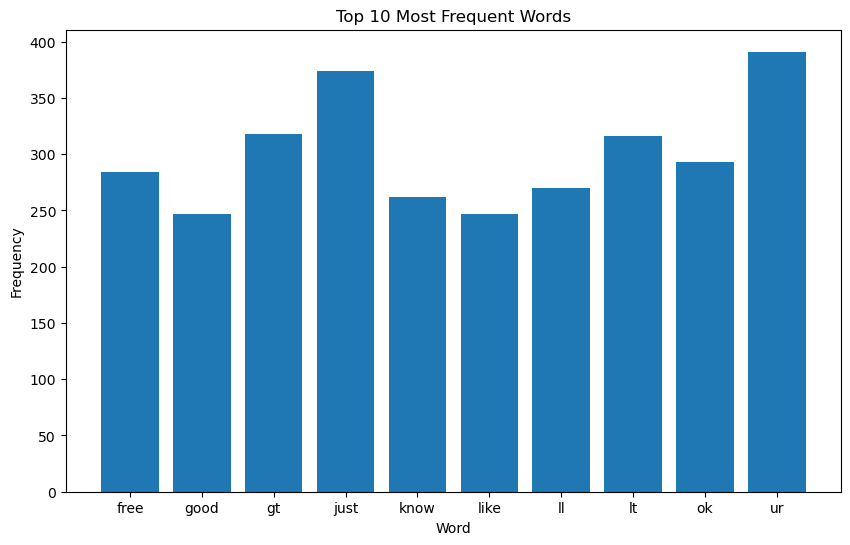

In [7]:
# Imports the CountVectorizer function from sklearn.
from sklearn.feature_extraction.text import CountVectorizer

# Assigns the CountVectorizer function to 'vectorizer'. 'stop_words=english' means to ignore English stop 
# words and 'max_features=10' means it will only take the top 10 most frequent words.
vectorizer = CountVectorizer(stop_words='english', max_features=10)
# Fits and transforms the 'Message' data to the vectorizer and assigns it to 'word_counts'.
word_counts = vectorizer.fit_transform(text_data['Message'])
# Gets the words from the vectorizer and assigns it to 'words'.
words = vectorizer.get_feature_names_out()

plt.figure(figsize=(10, 6)) # Makes the figure larger than it originally was.
plt.bar(words, word_counts.sum(axis=0).A1) # axis=0 sums the words across each row. .A1 flattens the matrix
                                           # into a one-dimensional array. See:
                                        # https://numpy.org/doc/stable/reference/generated/numpy.matrix.A1.html
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.savefig('wordfrequency.png')
plt.show()

This bar graph of the top 10 most frequent words doesn't seem to be super useful to the analysis, but it is interesting to look at. Since our dataset is comprised mostly of ham messages, it's not surprising that the most frequent words are pretty common in everyday texting language (like, ok, ur, etc.). However, the use of 'free' is interesting because that is commonly used in spam messages, but it can also come up often in ham messages. This is why one would not want to screen out all texts that contain a word like 'free' because you could miss out on real messages.

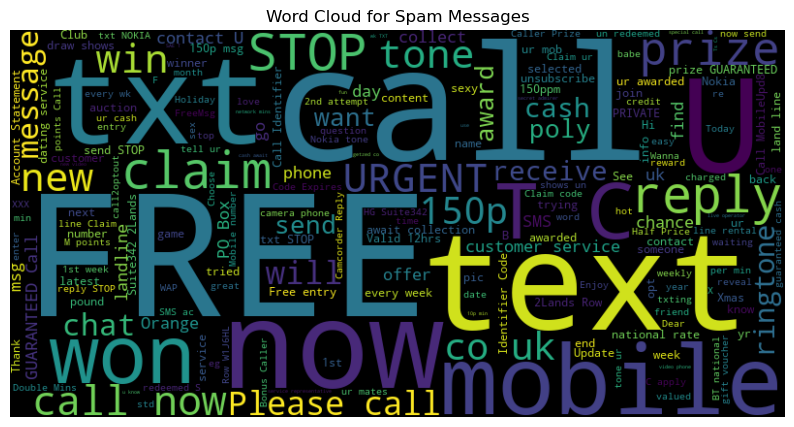

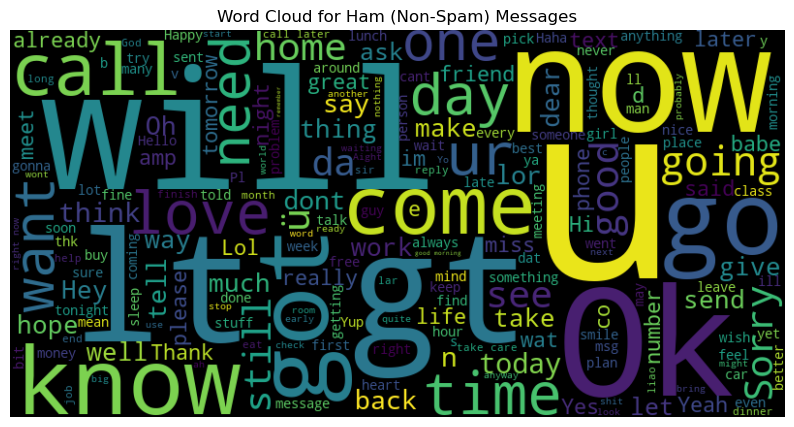

In [8]:
# Imports the wordcloud package to make the word clouds.
from wordcloud import WordCloud

# Creates a string variable called 'spam_messages' with all of the text messages that were labeled as spam.
spam_messages = ' '.join(text_data[text_data['Category'] == 'spam']['Message'])
# Creates the wordcloud_spam variable using the wordcloud function. Setting the width and height made the text
# clearer.
wordcloud_spam = WordCloud(width=800, height=400).generate(spam_messages)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_spam, interpolation='bilinear') # plt.imshow is used to plot images. bilinear 
                                                     # interpolation is supposed to display a smoother image.
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.savefig('spamwords.png')
plt.show()

# Creates a string variable called 'ham_messages' with all of the text messages that were labeled as ham.
ham_messages = ' '.join(text_data[text_data['Category'] == 'ham']['Message'])
wordcloud_ham = WordCloud(width=800, height=400).generate(ham_messages)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Word Cloud for Ham (Non-Spam) Messages')
plt.axis('off')
plt.savefig('hamwords.png')
plt.show()

This is perhaps my favorite plot of all of them. This is a word cloud of the most common words in both the spam and ham categories. It's interesting to see how the spam messages are comprised of words such as 'free,' 'prize,' 'collect,' 'won,' and 'claim,' which all seem to have something to do with winning a cash prize. You can also see 'urgent' in there which is a common word that security teams tell you to be wary of when assessing emails and texts. 

The ham plot is comprised of much more common and normal words such as 'will,' 'come,' 'go,' 'good,' and 'sorry.' It seems a lot less urgent and more naturalistic. These graphs will be good to refer back to when assessing the words that are common within the categories once they have been cleaned and processed.

==============================================================================================================

Overall, it was very interesting and useful to see the contents of the dataset by performing my graphical analysis. I am excited to see how the plots will change once the data has been cleaned.

In the next milestone, I plan on parsing the data to find out specific pieces of information, such as the text message length, the number of words used within each text, what words are most common between both categories, and what words are most common within both categories. I will also perform a few different categorical analysis models, such as logistic regressions and random forest regressions, to determine what the best model would be for categorizing the text. Cleaning steps for the data will include removing any unnecessary characters and whitespace, tokenizing the data using ‘word_tokenize’, removing English stop words, stemming the words to their root forms, vectorizing, and splitting the data into training and testing sets. Then, the data should be ready to be applied to categorical analysis models.

-----------

## Data Transformation

#### Import Libraries

In [9]:
# Imports the pandas package to import the .csv data.
import pandas as pd

In [10]:
# Loads the dataset into a data frame titled 'text_data' and prints the header to show it worked.
text_data = pd.read_csv("SPAM text message 20170820- Data.csv")
text_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Checks for any missing data. There is none, which is good.
missing_data = text_data.isnull().sum()
missing_data

Category    0
Message     0
dtype: int64

#### Transformation 1

In [12]:
# Changes the column headers to lowercase text for ease of typing.
text_data.columns = map(str.lower, text_data.columns)

# Prints the data frame header to show the change.
text_data.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Transformation 2

In [13]:
# Imports the contractions package.
import contractions

# Expands the contraction words (e.g., "don't") into their full words (e.g., "do not").
text_data['message'] = text_data['message'].apply(lambda x: contractions.fix(x))

# Prints the header to show the difference (see row 4 for an example).
text_data.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif you oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,YOU dun say so early hor... YOU c already then...
4,ham,"Nah I do not think he goes to usf, he lives ar..."


#### Transformation 3

In [14]:
# Changes all the text in the message column to lowercase for consistency. 
text_data['message_lower'] = text_data['message'].str.lower()

# Prints the data frame header to show the change.
text_data.head()

,category,message,message_lower
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif you oni...,ok lar... joking wif you oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,YOU dun say so early hor... YOU c already then...,you dun say so early hor... you c already then...
4,ham,"Nah I do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar..."


#### Transformation 4

In [15]:
# Imports the string package to remove punctuation and special characters.
import string

In [16]:
# Creates a new column containing the message data without punctuation and special characters.
text_data['new_message'] = text_data['message_lower'].apply(lambda x: ''.join([char for char in str(x)
                                                                               if char not in 
                                                                               string.punctuation]))
# Prints the data frame header to show the change.
text_data.head()

,category,message,message_lower,new_message
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif you oni...,ok lar... joking wif you oni...,ok lar joking wif you oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,YOU dun say so early hor... YOU c already then...,you dun say so early hor... you c already then...,you dun say so early hor you c already then say
4,ham,"Nah I do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar...",nah i do not think he goes to usf he lives aro...


#### Transformation 5

In [17]:
# Imports the NLTK package, and then downloads the stopwords and punkt packages to remove the stop words from 
# the text. 
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Imports the 'stopwords' and 'word_tokenize' functions from NLTK.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /Users/ahria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ahria/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
# Sets the stop words to be English stop words.
stop_words = set(stopwords.words('english'))

In [19]:
# Creates a function to remove the stop words from each row in the 'message' column. Then, it tokenizes the
# words, removes the stop words from the tokenized words, and then joins the non-stop words together.
def remove_stopwords(message):
    words = word_tokenize(str(message))
    no_stopwords = [word for word in words if word.lower() not in stop_words]
    return ' '.join(no_stopwords)

In [20]:
# Applies the 'remove_stopwords' function to the 'new_message' column and creates a new column containing the
# cleaned data.
text_data['message_no_stopwords'] = text_data['new_message'].apply(remove_stopwords)

# Prints the data frame header to show the change.
text_data.head()

,category,message,message_lower,new_message,message_no_stopwords
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif you oni...,ok lar... joking wif you oni...,ok lar joking wif you oni,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,YOU dun say so early hor... YOU c already then...,you dun say so early hor... you c already then...,you dun say so early hor you c already then say,dun say early hor c already say
4,ham,"Nah I do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar...",nah i do not think he goes to usf he lives aro...,nah think goes usf lives around though


#### Transformation 6

In [21]:
# Imports the PorterStemmer function from NLTK.
from nltk.stem.porter import PorterStemmer

In [22]:
# Creates a function to tokenize and stem all the words in the column.
def use_PorterStemmer(message):
    tokenized_words = word_tokenize(str(message))
    porter = PorterStemmer()
    return [porter.stem(word) for word in tokenized_words]

In [23]:
# Applies the function on the 'message_no_stopwords' column and creates a new column with the stemmed data.
text_data['stemmed_message'] = text_data['message_no_stopwords'].apply(use_PorterStemmer)

# Prints out the data frame header to show the change.
text_data.head()

,category,message,message_lower,new_message,message_no_stopwords,stemmed_message
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif you oni...,ok lar... joking wif you oni...,ok lar joking wif you oni,ok lar joking wif oni,"[ok, lar, joke, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,YOU dun say so early hor... YOU c already then...,you dun say so early hor... you c already then...,you dun say so early hor you c already then say,dun say early hor c already say,"[dun, say, earli, hor, c, alreadi, say]"
4,ham,"Nah I do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar...",nah i do not think he goes to usf he lives aro...,nah think goes usf lives around though,"[nah, think, goe, usf, live, around, though]"


#### Transformation 7

In [24]:
# Adds a column for the length of the 'message' column. This could be useful in determining if a message is
# spam or ham.
text_data['message_length'] = text_data['message'].apply(len)

# Prints the data frame header to show the change.
text_data.head()

,category,message,message_lower,new_message,message_no_stopwords,stemmed_message,message_length
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazi, avail, bugi, n, gre...",111
1,ham,Ok lar... Joking wif you oni...,ok lar... joking wif you oni...,ok lar joking wif you oni,ok lar joking wif oni,"[ok, lar, joke, wif, oni]",31
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",155
3,ham,YOU dun say so early hor... YOU c already then...,you dun say so early hor... you c already then...,you dun say so early hor you c already then say,dun say early hor c already say,"[dun, say, earli, hor, c, alreadi, say]",53
4,ham,"Nah I do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar...",nah i do not think he goes to usf he lives aro...,nah think goes usf lives around though,"[nah, think, goe, usf, live, around, though]",62


#### Transformation 8

In [25]:
# Adds a column for the length of the 'stemmed_message' column. I am unsure if it would be better to analyze
# the probability of a message being spam or ham using the normal message length or the stemmed message length,
# so I will include both.
text_data['stem_message_length'] = text_data['stemmed_message'].apply(len)

# Prints the data frame header to show the change.
text_data.head()

,category,message,message_lower,new_message,message_no_stopwords,stemmed_message,message_length,stem_message_length
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazi, avail, bugi, n, gre...",111,16
1,ham,Ok lar... Joking wif you oni...,ok lar... joking wif you oni...,ok lar joking wif you oni,ok lar joking wif oni,"[ok, lar, joke, wif, oni]",31,5
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",155,23
3,ham,YOU dun say so early hor... YOU c already then...,you dun say so early hor... you c already then...,you dun say so early hor you c already then say,dun say early hor c already say,"[dun, say, earli, hor, c, alreadi, say]",53,7
4,ham,"Nah I do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar...",nah i do not think he goes to usf he lives aro...,nah think goes usf lives around though,"[nah, think, goe, usf, live, around, though]",62,7


#### Transformation 9

In [26]:
# Imports the TextBlob function from textblob.
from textblob import TextBlob

In [27]:
# Creates a function to analyze the passed data for subjectivity and polarity and create columns for those 
# scores.
def sentiment_analysis(message):
    def getSubjectivity(text):
        return TextBlob(text).sentiment.subjectivity
    
    def getPolarity(text):
        return TextBlob(text).sentiment.polarity
    
    # Applies the subjectivity and polarity functions on each row of the data in the 'message' column.
    text_data['subjectivity'] = message.apply(getSubjectivity)
    text_data['polarity'] = message.apply(getPolarity)

In [28]:
# Executes the above function on the 'message' column.
sentiment_analysis(text_data['message'])

In [29]:
# Executes the subjectivity function on the 'stemmed_message' column. This could not run through the above 
# function because the data were in lists.
text_data['stem_subjectivity'] = text_data['stemmed_message'].apply(
    lambda x: TextBlob(' '.join(x)).sentiment.subjectivity)

In [30]:
# Executes the polarity function on the 'stemmed_message' column. This could not run through the above function
# because the data were in lists.
text_data['stem_polarity'] = text_data['stemmed_message'].apply(
    lambda x: TextBlob(' '.join(x)).sentiment.polarity)

In [31]:
# Prints the data frame header to show the changes.
text_data.head()

,category,message,message_lower,new_message,message_no_stopwords,stemmed_message,message_length,stem_message_length,subjectivity,polarity,stem_subjectivity,stem_polarity
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazi, avail, bugi, n, gre...",111,16,0.7625,0.15,0.75,0.800000
1,ham,Ok lar... Joking wif you oni...,ok lar... joking wif you oni...,ok lar joking wif you oni,ok lar joking wif oni,"[ok, lar, joke, wif, oni]",31,5,0.5000,0.50,0.50,0.500000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",155,23,0.5500,0.30,0.55,0.300000
3,ham,YOU dun say so early hor... YOU c already then...,you dun say so early hor... you c already then...,you dun say so early hor you c already then say,dun say early hor c already say,"[dun, say, earli, hor, c, alreadi, say]",53,7,0.3000,0.10,0.00,0.000000
4,ham,"Nah I do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar...",nah i do not think he goes to usf he lives aro...,nah think goes usf lives around though,"[nah, think, goe, usf, live, around, though]",62,7,0.0000,0.00,0.50,0.136364


#### Transformation 10

In [32]:
# Drops the unnecessary columns (ones created during the cleaning steps).
drop_columns = ['message_lower', 'new_message', 'message_no_stopwords']
text_data.drop(columns=drop_columns, inplace=True)

# Prints the data frame header to show it worked.
text_data.head()

,category,message,stemmed_message,message_length,stem_message_length,subjectivity,polarity,stem_subjectivity,stem_polarity
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazi, avail, bugi, n, gre...",111,16,0.7625,0.15,0.75,0.800000
1,ham,Ok lar... Joking wif you oni...,"[ok, lar, joke, wif, oni]",31,5,0.5000,0.50,0.50,0.500000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",155,23,0.5500,0.30,0.55,0.300000
3,ham,YOU dun say so early hor... YOU c already then...,"[dun, say, earli, hor, c, alreadi, say]",53,7,0.3000,0.10,0.00,0.000000
4,ham,"Nah I do not think he goes to usf, he lives ar...","[nah, think, goe, usf, live, around, though]",62,7,0.0000,0.00,0.50,0.136364


#### Transformation 11

In [33]:
# Since I am unsure if it's best to analyze the data based on the original message data or the stemmed (when
# it comes to things like subjectivity/polarity), I will create two separate data frames to eventually
# run my model on.

# Specifies which columns I want to copy from the original data frame to add to the new one.
copy_columns = ['category', 'stemmed_message']

# Copies those columns to a new data frame.
stem_text_data = text_data[copy_columns].copy()

# Prints the header of the new data frame to show it worked.
stem_text_data.head()

,category,stemmed_message
0,ham,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,"[ok, lar, joke, wif, oni]"
2,spam,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,"[dun, say, earli, hor, c, alreadi, say]"
4,ham,"[nah, think, goe, usf, live, around, though]"


In [34]:
# Specifies which columns I want to 'pop' from the original data frame.
pop_columns = ['stem_message_length', 'stem_subjectivity', 'stem_polarity']

# Goes through each column and pops it from the original data frame while adding it to the new one.
for column in pop_columns:
    stem_text_data[column] = text_data.pop(column)
    
# Prints the header of the new data frame to show the change.
stem_text_data.head()

,category,stemmed_message,stem_message_length,stem_subjectivity,stem_polarity
0,ham,"[go, jurong, point, crazi, avail, bugi, n, gre...",16,0.75,0.800000
1,ham,"[ok, lar, joke, wif, oni]",5,0.50,0.500000
2,spam,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",23,0.55,0.300000
3,ham,"[dun, say, earli, hor, c, alreadi, say]",7,0.00,0.000000
4,ham,"[nah, think, goe, usf, live, around, though]",7,0.50,0.136364


In [35]:
# Prints the header of the original data frame to show the changes.
text_data.head()

,category,message,stemmed_message,message_length,subjectivity,polarity
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazi, avail, bugi, n, gre...",111,0.7625,0.15
1,ham,Ok lar... Joking wif you oni...,"[ok, lar, joke, wif, oni]",31,0.5000,0.50
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",155,0.5500,0.30
3,ham,YOU dun say so early hor... YOU c already then...,"[dun, say, earli, hor, c, alreadi, say]",53,0.3000,0.10
4,ham,"Nah I do not think he goes to usf, he lives ar...","[nah, think, goe, usf, live, around, though]",62,0.0000,0.00


#### Transformation 12

In [36]:
# Imports the CountVectorizer function from sklearn.
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
# Creates a new column transforming the 'stemmed_message' column into string values since the rest of the
# code wouldn't work without them being string values.
text_data['stemmed_message_str'] = text_data['stemmed_message'].apply(lambda x: ' '.join(x))

# Uses the CountVectorizer function to create a bag-of-words matrix from the stemmed words.
count = CountVectorizer()
bag_of_words = count.fit_transform(text_data['stemmed_message_str'])

# Prints out the matrix dimensions.
bag_of_words.shape

(5572, 8022)

In [38]:
# The original data frame has the same number of rows as the bag-of-words matrix, which is good.
text_data.shape

(5572, 7)

I will not do this to the stem_text_data data frame too since it is the same data being used ('stemmed_message').

#### Transformation 13

In [39]:
# Imports the TF-IDF Vectorizer function from sklearn.
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
# Creates a TF-IDF matrix from the stemmed messages text and then displays the dimensions. The dimensions are 
# the same as the bag-of-words, which is good.
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(text_data['stemmed_message_str'])

feature_matrix.shape

(5572, 8022)

Again, I will not do this with the stem_text_data data frame since it's the same column of stemmed data.

#### Transformation 14

In [41]:
# Drops the 'stemmed_message_str' column from the data frame since it is redundant. 
text_data.drop(columns=['stemmed_message_str'], inplace=True)

In [42]:
# Prints the data frame header to show it worked.
text_data.head()

,category,message,stemmed_message,message_length,subjectivity,polarity
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazi, avail, bugi, n, gre...",111,0.7625,0.15
1,ham,Ok lar... Joking wif you oni...,"[ok, lar, joke, wif, oni]",31,0.5000,0.50
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",155,0.5500,0.30
3,ham,YOU dun say so early hor... YOU c already then...,"[dun, say, earli, hor, c, alreadi, say]",53,0.3000,0.10
4,ham,"Nah I do not think he goes to usf, he lives ar...","[nah, think, goe, usf, live, around, though]",62,0.0000,0.00


#### Transformation 15

In [43]:
# Creates dummy variables for the 'category' column in both data frames. The other data that will be used
# in the model are already numerical data (minus the 'stemmed_message' columns), so it is not necessary to
# create dummies for them. 'drop_first=True' is a good practice to avoid multicollinearity, even in binary
# scenarios like this one.
text_data = pd.get_dummies(text_data, columns=['category'], drop_first=True)
stem_text_data = pd.get_dummies(stem_text_data, columns=['category'], drop_first=True)

In [44]:
# Prints the data frame header to show the change.
text_data.head()

,message,stemmed_message,message_length,subjectivity,polarity,category_spam
0,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazi, avail, bugi, n, gre...",111,0.7625,0.15,False
1,Ok lar... Joking wif you oni...,"[ok, lar, joke, wif, oni]",31,0.5000,0.50,False
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",155,0.5500,0.30,True
3,YOU dun say so early hor... YOU c already then...,"[dun, say, earli, hor, c, alreadi, say]",53,0.3000,0.10,False
4,"Nah I do not think he goes to usf, he lives ar...","[nah, think, goe, usf, live, around, though]",62,0.0000,0.00,False


In [45]:
# Prints the data frame header to show the change.
stem_text_data.head()

,stemmed_message,stem_message_length,stem_subjectivity,stem_polarity,category_spam
0,"[go, jurong, point, crazi, avail, bugi, n, gre...",16,0.75,0.800000,False
1,"[ok, lar, joke, wif, oni]",5,0.50,0.500000,False
2,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",23,0.55,0.300000,True
3,"[dun, say, earli, hor, c, alreadi, say]",7,0.00,0.000000,False
4,"[nah, think, goe, usf, live, around, though]",7,0.50,0.136364,False


The data should now be sufficiently cleaned and ready for model building and evaluation. The data have been cleaned by making all the text lowercase, removing punctuation and stop words, and stemming the messages using PorterStemmer(). Then, calculations of the length (both for the original message and the stemmed message) and the subjectivity and polarity (also for both) of the messages were performed and added into columns. The calculations of the stemmed message data were added to a new data frame to keep the data separate, and all the unnecessary columns were dropped. I left the 'message' column in the original 'text_data' data frame just for me to be able to easily tell the difference between the data frames. It will not be included in any model building or evaluation. Finally, dummy variables of the 'category' column were created. The first dummy variable was dropped for consistency with other dummy variable practices to avoid multicollinearity. The final versions of the data frames were printed, showing the headers.

## Models

#### Import Libraries

In [46]:
# Imports the pandas library, some sklearn libraries to model the data and obtain statistics from it, and the
# TFIDF-matrix package (some packages technically already loaded since I ran the previous milestone's cells,
# but to keep consistency, I'll import them as if I were starting a new notebook).
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

Since my data involve classifiying text messages into two categories, I want to go with classification models. I will try three different models on the two versions of my data (text_data; stem_text_data): Random Forest Classifier (RFC), Logistic Regression (LR), and Support Vector Classifier (SVC). 

RFCs are good at handling imbalanced data, which is perfect for my dataset, and there are parameters that can be adjusted to help prevent overfitting. RFCs are also good for binary characteristics, which applies to my target variable (message type). 

LRs are good for binary classifiers, which applies to my target variable, and are generally faster to compute than other models. LRs can also be adjusted to balance the data, which is beneficial in my case, and can be easier to interpret when compared to other model outputs. 

SVCs are able to handle non-linear data. As we'll see later on, the balance between spam and non-spam messages is very imbalanced, meaning that linear models my not be the best choice. SVCs are not prone to overfitting, which also makes it an attractive choice.

All models are able to balance the data using the "class_weight='balanced'" parameter.

Sources:
- https://builtin.com/data-science/random-forest-algorithm
- https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/#:~:text=A.%20Random%20Forest%20is%20a,and%20outliers%20in%20the%20data.
- https://aws.amazon.com/what-is/logistic-regression/#:~:text=Logistic%20regression%20models%20can%20process,as%20memory%20and%20processing%20power.
- https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/
- https://towardsdatascience.com/everything-about-svm-classification-above-and-beyond-cc665bfd993e
- https://dhirajkumarblog.medium.com/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107
- https://www.geeksforgeeks.org/support-vector-machine-in-machine-learning/

### Models on the 'text_data' Data Frame.

In [47]:
# These features will be used for all models, so I have them in a cell outside of the modeling.
# Combines the other features with the TFIDF-matrix and assigns them all to 'features'.
features = pd.concat([text_data[['message_length', 'subjectivity', 'polarity']],
                      pd.DataFrame(feature_matrix.toarray(), 
                                   columns=tfidf.get_feature_names_out())], axis=1)

# Assigns the 'category_spam' data to the 'target' variable.
target = text_data['category_spam']

In [48]:
# Displays the difference of True and False values in the target, 'category_spam', column. This is relevant
# for all my models.
text_data['category_spam'].value_counts()

category_spam
False    4825
True      747
Name: count, dtype: int64

#### Random Forest Classifier Model

In [49]:
# I standardized the features in future models, but it is not common practice to do that with RFCs, and the
# book did not do it, so I did not standardize my features for this model. However, see the conclusion.

# Performs train_test_split on the features and target of the 'text_data' data frame with a test size of 20%.
rf_features_train, rf_features_test, rf_target_train, rf_target_test = train_test_split(features, 
                                                                                        target, test_size=0.2, 
                                                                                        random_state=42)

In [50]:
# Assigns the 'RandomForestClassifier' function to 'randomforest' and adds parameters to help mitigate 
# overfitting and to speed up processing. The "class_weight='balanced'" will be used for all models since my
# target classes are very imbalanced.
randomforest = RandomForestClassifier(random_state=42, class_weight ='balanced', max_depth=10, n_jobs=-1)

In [51]:
# Fits the model to the training data and assigns it to 'rf_model'.
rf_model = randomforest.fit(rf_features_train, rf_target_train)

In [52]:
# Makes predictions using the model on the test features and assigns them to 'rf_preds'.
rf_preds = rf_model.predict(rf_features_test)

In [53]:
# Prints the accuracy score of the model, which is ~98%.
accuracy_score(rf_target_test, rf_preds)

0.97847533632287

In [54]:
# Prints the classification report neatly to examine the performance of the model.
print(classification_report(rf_target_test, rf_preds))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       966
        True       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [55]:
# Prints the cross-validation scores for the RFC model.
print(cross_val_score(randomforest, rf_features_train, rf_target_train, cv=10, scoring='precision'))

[0.98148148 0.89285714 0.96078431 0.88679245 0.98113208 1.
 0.94230769 0.92727273 1.         0.92      ]


I chose to evaluate the accuracy, precision, recall, f1 scores, and cross-validation scores of my RFC model because they can give a quick, yet descriptive table on how well the model performed. I printed out the accuracy score separately since it gives a more detailed number (more decimal points).

This model had an accuracy score of ~98%, which is very good. However, it's important to evaluate the precision and recall with these data since we want to be able to successfully determine and filter out spam messages without flagging actual texts. I would imagine that customers would not be happy with their real text messages being blocked. This model's precision was ~98% for non-spam messages and ~100% for spam messages. Precision is the number of true positives/negatives among all of the predicted positives/predicted negatives (respectively), so the model correctly identified 100% of the predicted true positives (spam messages) and 98% of the predicted true negatives (non-spam). 

The model's recall score for non-spam messages (False) was 100%, which indicates that the model does excellent at determining a message is not spam. However, it does worse with the true spam messages at ~84%. This may not be a total negative, however, because at least the non-spam messages are more consistently being assigned as non-spam. An occasional spam message here and there is better, to me, than non-spam messages being classified as spam. So, out of all the non-spam messages in the data, the model correctly identified 100% of them, and out of all spam messages in the data, the model correctly identified 84% of them. The f1 scores are a mean between precision and recall.

I was worried about overfitting since the scores were that good, so I played around with different parameter values. However, the scores seemed to hover around the 98% accuracy area. I wanted to also look at the cross-validation scores for more insight to potential overfitting. I performed a 10-fold cross-validation on the model, and all of the scores ranged from 89% to 100%, showing that even when selecting different subsets of the data, the model, overall, does very well with precision of true positives (true spam). 

#### Logistic Regression Model

In [56]:
# Assigns the 'StandardScaler' function to 'scaler'.
scaler = StandardScaler()

# Fits and transforms the scaler to the features to standardize them.
features_standardized = scaler.fit_transform(features)

In [57]:
# Performs train_test_split on the features and target of the 'text_data' data frame with a test size of 20%.
lr_features_train, lr_features_test, lr_target_train, lr_target_test = train_test_split(features_standardized, 
                                                                                        target, test_size=0.2, 
                                                                                        random_state=42)

In [58]:
# Assigns the LogisticRegression function to 'logistic_regression' and adds parameters to help prevent
# overfitting. (Adding "penalty='l1'" did not work, but "penalty='l2'" gave the exact same results as with no 
# penalty parameter).
logisticregression = LogisticRegression(random_state=42, C=0.1, class_weight='balanced', n_jobs=-1)

In [59]:
# Fits the model to the training data and assigns it to 'lr_model'.
lr_model = logisticregression.fit(lr_features_train, lr_target_train)

In [60]:
# Makes predictions using the model on the test features and assigns them to 'lr_preds'.
lr_preds = lr_model.predict(lr_features_test)

In [61]:
# Prints the accuracy score of the model, which is ~97%.
accuracy_score(lr_target_test, lr_preds)

0.9721973094170404

In [62]:
# Prints the classification report neatly to examine the performance of the model.
print(classification_report(lr_target_test, lr_preds))

              precision    recall  f1-score   support

       False       0.97      1.00      0.98       966
        True       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [63]:
# Prints the cross-validation scores for the LR model.
print(cross_val_score(logisticregression, lr_features_train, lr_target_train, cv=10, scoring='precision'))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


I, again, chose to evaluate the accuracy, precision, recall, f1 scores, and cross-validation scores of my LR model because they can give a quick, yet descriptive table on how well the model performed. I printed out the accuracy score separately since it gives a more detailed number (more decimal points).

This model had an accuracy score of ~97%, which is still very good. I wanted to evaluate the precision and recall with these data for the same reason as with the RFC model: to examine if it can successfully determine and filter out spam messages without flagging actual texts. This model's precision was ~97% for non-spam messages and ~100% for spam messages. Precision is the number of true positives/negatives among all of the predicted positives/predicted negatives (respectively), so the model correctly identified 100% of the predicted true positives (spam messages) and 97% of the predicted true negatives (non-spam).

The model's recall score for non-spam messages (False) was 100%, which indicates that the model does excellent at determining a message is not spam. However, it does worse with the true spam messages at ~79%. So, out of all the non-spam messages in the data, the model correctly identified 100% of them, and out of all spam messages in the data, the model correctly identified 79% of them. This has a worse performance than the RFC model. Again, this may not be a total negative because at least the non-spam messages are more consistently being assigned as non-spam. The f1 scores are a mean between precision and recall.

I was still worried about overfitting since the scores were that good, so I played around with different parameter values with this model, as well. I wanted to look at the cross-validation scores for more insight to potential overfitting. I performed a 10-fold cross-validation on the model, and all of the scores were 100%. Even when checking with a 50-fold cross validation, it was 100% across the board. This is a bit concerning because while it shows that it does so well in identifying spam messages within several subsets of the data, it makes me skeptical. The model may be overfit.

#### Support Vector Classifier Model

In [64]:
# Performs train_test_split on the standardized features and target of the 'text_data' data frame with a test 
# size of 20%.
svc_features_train, svc_features_test, svc_target_train, svc_target_test = train_test_split(
    features_standardized, target, test_size=0.2, random_state=42)

In [65]:
# Assigns the SVC function to 'svc' and adds parameters to help prevent overfitting.
svc = SVC(kernel='linear', class_weight='balanced', C=0.5, random_state=42)

In [66]:
# Fits the SVC model to the training data.
svc_model = svc.fit(svc_features_train, svc_target_train)

In [67]:
# Makes predictions using the SVC model on the test features.
svc_preds = svc_model.predict(svc_features_test)

In [68]:
# Evaluates the accuracy of the SVC model using the test target and predictions.
accuracy_score(svc_target_test, svc_preds)

0.9668161434977578

In [69]:
# Prints the classification report of this model.
print(classification_report(svc_target_test, svc_preds))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98       966
        True       0.98      0.77      0.86       149

    accuracy                           0.97      1115
   macro avg       0.97      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [70]:
# Prints the cross-validation score for the SVC model.
print(cross_val_score(svc, svc_features_train, svc_target_train, cv=10, scoring='precision'))

[1.         1.         0.97619048 1.         1.         1.
 1.         1.         0.97777778 1.        ]


I, again, chose to evaluate the accuracy, precision, recall, f1 scores, and cross-validation scores of my SVC model because they can give a quick, yet descriptive table on how well the model performed. I printed out the accuracy score separately since it gives a more detailed number (more decimal points).

This model had an accuracy score of ~97%, which is still very good. I wanted to evaluate the precision and recall with these data for the same reason as with the other models: to examine if it can successfully determine and filter out spam messages without flagging actual texts. This model's precision was ~96% for non-spam messages and ~98% for spam messages. Precision is the number of true positives/negatives among all of the predicted positives/predicted negatives (respectively), so the model correctly identified 98% of the predicted true positives (spam messages) and 96% of the predicted true negatives (non-spam).

The model's recall score for non-spam messages (False) was 100%, which indicates that the model does excellent at determining a message is not spam. However, it does worse with the true spam messages at ~77%. So, out of all the non-spam messages in the data, the model correctly identified 100% of them, and out of all spam messages in the data, the model correctly identified 77% of them. So far, this is the worst performance of all the models, even if the difference is a few percentage points. Again, this may not be a total negative because at least the non-spam messages are more consistently being assigned as non-spam. The f1 scores are a mean between precision and recall.

I wanted to also look at the cross-validation scores for more insight to potential overfitting. I performed a 10-fold cross-validation on the model, and all of the scores ranged from 98-100% showing that even when selecting different subsets of the data, the model, overall, does very well with precision of true positives (true spam). Again, though, I do still worry about overfitting.

### Models on the 'stemmed_text_data' Data Frame.

Since the TFIDF-matrix performed in Milestone 2 was done on the 'stemmed_message' column, its results would be the same, even if I did it again on the 'stem_text_data' data frame's 'stemmed_message' column. Because of this, I will use the same TFIDF-for my features.

I will also perform the same models as with the 'text_data' data frame to see if they are better or worse on this data. The parameters will be the same.

In [71]:
# Combines the other features with the TFIDF-matrix and assigns them all to 'features2'.
features2 = pd.concat([stem_text_data[['stem_message_length', 'stem_subjectivity', 'stem_polarity']],
                      pd.DataFrame(feature_matrix.toarray(), 
                                   columns=tfidf.get_feature_names_out())], axis=1)

# Assigns the 'category_spam' data to the 'target2' variable.
target2 = stem_text_data['category_spam']

#### Random Forest Classifier Model

In [72]:
# Performs train_test_split on the features and target of the 'stem_text_data' data frame with a test size of 
# 20%.
rf_features_train2, rf_features_test2, rf_target_train2, rf_target_test2 = train_test_split(features2, target2,
                                                                                            test_size=0.2, 
                                                                                            random_state=42)

In [73]:
# Assigns the 'RandomForestClassifier' function to 'randomforest2' and adds parameters to help mitigate 
# overfitting and to speed up processing. The "class_weight='balanced'" will be used for all models again,
# since my target classes are very imbalanced.
randomforest2 = RandomForestClassifier(random_state=42, class_weight ='balanced', max_depth=10, n_jobs=-1)

In [74]:
# Fits the model to the training data and assigns it to 'rf_model2'.
rf_model2 = randomforest2.fit(rf_features_train2, rf_target_train2)

In [75]:
# Makes predictions using the model on the test features and assigns them to 'rf_preds'.
rf_preds2 = rf_model2.predict(rf_features_test2)

In [76]:
# Prints the accuracy score of the model, which is ~98%.
accuracy_score(rf_target_test2, rf_preds2)

0.9757847533632287

In [77]:
# Prints the classification report neatly to examine the performance of the model.
print(classification_report(rf_target_test2, rf_preds2))

              precision    recall  f1-score   support

       False       0.97      1.00      0.99       966
        True       0.99      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



In [78]:
# Prints the cross-validation scores for the RFC model.
print(cross_val_score(randomforest2, rf_features_train2, rf_target_train2, cv=10, scoring='precision'))

[0.98148148 0.94339623 0.96       0.88888889 1.         0.94
 0.94230769 0.94545455 0.97959184 0.93478261]


I chose to evaluate the accuracy, precision, recall, f1 scores, and cross-validation scores of my RFC model again because they can give a quick, yet descriptive table on how well the model performed. I printed out the accuracy score separately since it gives a more detailed number (more decimal points).

This model had an accuracy score of ~98% again, which is still very good. This model's precision was ~97% for non-spam messages and ~99% for spam messages. Precision is the number of true positives/negatives among all of the predicted positives/predicted negatives (respectively), so the model correctly identified 99% of the predicted true positives (spam messages) and 97% of the predicted true negatives (non-spam). 

The model's recall score for non-spam messages (False) was 100%, which indicates that the model does excellent at determining a message is not spam. However, it does worse with the true spam messages at ~83%. So, of all the real non-spam messages, 100% were correctly identified as non-spam, and of all the real spam messages, 83% were correctly identified as spam. The f1 scores are a mean between precision and recall.

As with the previous models, I wanted to perform cross-validation testing to look for potential overfitting. I wanted to also look at the cross-validation scores for more insight to potential overfitting. I performed a 10-fold cross-validation on the model, and all of the scores ranged from 89% to 100% again, showing that even when selecting different subsets of the data, the model, overall, does very well with precision of true positives (true spam). 

This second RFC model on stemmed text data did a little "worse" than the first, with a 1% decrease on the precision scores for both True and False values and the recall of true spam messages. However, I don't think this is necessarily bad, and it really isn't much of a difference.

#### Logistic Regression Model

In [79]:
# Again, I will standardize the features to the logistic regression, as the book's author does.
# Assigns the 'StandardScaler' function to 'scaler2'.
scaler2 = StandardScaler()

# Fits and transforms the scaler to the second set of features to standardize them.
features_standardized2 = scaler2.fit_transform(features2)

In [80]:
# Performs train_test_split on the features and target of the 'stem_text_data' data frame with a test size of 
# 20%.
lr_features_train2, lr_features_test2, lr_target_train2, lr_target_test2 = train_test_split(
    features_standardized2, target2, test_size=0.2, random_state=42)

In [81]:
# Assigns the LogisticRegression function to 'logistic_regression2' and adds parameters to help prevent
# overfitting. (Again, "penalty='l1'" did not work, but "penalty='l2'" gave the same results as no penalty 
# parameter).
logisticregression2 = LogisticRegression(random_state=42, C=0.1, class_weight='balanced', 
                                        n_jobs=-1)

In [82]:
# Fits the model to the training data and assigns it to 'lr_model2'.
lr_model2 = logisticregression2.fit(lr_features_train2, lr_target_train2)

In [83]:
# Makes predictions using the model on the test features and assigns them to 'lr_preds2'.
lr_preds2 = lr_model2.predict(lr_features_test2)

In [84]:
# Prints the accuracy score of the model, which is ~97%.
accuracy_score(lr_target_test2, lr_preds2)

0.9730941704035875

In [85]:
# Prints the classification report neatly to examine the performance of the model.
print(classification_report(lr_target_test2, lr_preds2))

              precision    recall  f1-score   support

       False       0.97      1.00      0.98       966
        True       1.00      0.80      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [86]:
# Prints the cross-validation scores for the LR model.
print(cross_val_score(logisticregression2, lr_features_train2, lr_target_train2, cv=10, scoring='precision'))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


I, again, chose to evaluate the accuracy, precision, recall, f1 scores, and cross-validation scores of my LR model because they can give a quick, yet descriptive table on how well the model performed. I printed out the accuracy score separately since it gives a more detailed number (more decimal points).

This model had an accuracy score of ~97%, which is still very good. I wanted to evaluate the precision and recall with these data for the same reason as with the other models: to examine if it can successfully determine and filter out spam messages without flagging actual texts. This model's precision was ~97% for non-spam messages and ~100% for spam messages. Precision is the number of true positives/negatives among all of the predicted positives/predicted negatives (respectively), so the model correctly identified 100% of the predicted true positives (spam messages) and 97% of the predicted true negatives (non-spam).

The model's recall score for non-spam messages (False) was 100%, which indicates that the model does excellent at determining a message is not spam. However, it does worse with the true spam messages at ~80%. This is still slightly worse than the RFC model. So, out of all the non-spam messages in the data, the model correctly identified 100%, and out of all the spam messages in the data, the model correctly identified 80%. Again, this may not be a total negative because at least the non-spam messages are more consistently being assigned as non-spam. The f1 scores are a mean between precision and recall.

As with all of the other models, I wanted to look at the cross-validation scores for more insight to potential overfitting. I performed a 10-fold cross-validation on the model, and all of the scores were 100%. Even when checking with a 50-fold cross validation, it was 100% across the board. This is a bit concerning and makes me skeptical. The model may be overfit.

This LR model on stemmed text data performed ever so slightly better than on the regular text data (higher recall of true negative values), but it likely isn't a noticeable difference. 

#### Support Vector Classifier Model

In [87]:
# Performs train_test_split on the standardized features and target of the 'stem_text_data' data frame with a 
# test size of 20%.
svc_features_train2, svc_features_test2, svc_target_train2, svc_target_test2 = train_test_split(
    features_standardized2, target2, test_size=0.2, random_state=42)

In [88]:
# Assigns the SVC function to 'svc2' and adds parameters to help prevent overfitting.
svc2 = SVC(kernel='linear', class_weight='balanced', C=0.5, random_state=42)

In [89]:
# Fits the SVC model to the training data.
svc_model2 = svc2.fit(svc_features_train2, svc_target_train2)

In [90]:
# Makes predictions using the SVC model on the test features.
svc_preds2 = svc_model2.predict(svc_features_test2)

In [91]:
# Evaluates the accuracy of the SVC model using the test target and predictions.
accuracy_score(svc_target_test2, svc_preds2)

0.9668161434977578

In [92]:
# Prints the classification report of this model.
print(classification_report(svc_target_test2, svc_preds2))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98       966
        True       0.98      0.77      0.86       149

    accuracy                           0.97      1115
   macro avg       0.97      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [93]:
# Prints the cross-validation score for the SVC model.
print(cross_val_score(svc2, svc_features_train2, svc_target_train2, cv=10, scoring='precision'))

[1.         1.         0.97619048 1.         1.         1.
 1.         1.         0.97777778 1.        ]


I, again, chose to evaluate the accuracy, precision, recall, f1 scores, and cross-validation scores of my SVC model because they can give a quick, yet descriptive table on how well the model performed. I printed out the accuracy score separately since it gives a more detailed number (more decimal points).

This model had an accuracy score of ~97%, which is still very good. I wanted to evaluate the precision and recall with these data for the same reason as with the other models: to examine if it can successfully determine and filter out spam messages without flagging actual texts. This model's precision was ~96% for non-spam messages and ~98% for spam messages. Precision is the number of true positives/negatives among all of the predicted positives/predicted negatives (respectively), so the model correctly identified 98% of the predicted true positives (spam messages) and 96% of the predicted true negatives (non-spam).

The model's recall score for non-spam messages (False) was 100%, which indicates that the model does excellent at determining a message is not spam. However, it does worse with the true spam messages at ~77%. So, out of all the non-spam messages in the data, the model correctly identified 100%, and out of all the spam messages in the data, the model correctly identified 77%. So far, this is the still the worst performance of all the models. Again, this may not be a total negative because at least the non-spam messages are more consistently being assigned as non-spam. The f1 scores are a mean between precision and recall.

I wanted to also look at the cross-validation scores for more insight to potential overfitting. I performed a 10-fold cross-validation on the model, and all of the scores ranged from 98-100% showing that even when selecting different subsets of the data, the model, overall, does very well with precision of true positives (true spam). Again, though, I do still worry about overfitting.

The SVC model on stemmed text data seemed to perform the exact same as on regular text data.

### Conclusion:
Overall, all of the classification models (Random Forest Classifier, Logistic Regression, and Support Vector Classifier) did very well on these datasets (with accuracy scores 97% or above, precision scores 96% and above, and recall scores of 77% and above). The difference of stemming the text before obtaining the features did not seem to have a major effect on any of the models' effectiveness. My personal favorite model was the RFC model because they both consistently had the highest f1-scores on both the spam and non-spam messages, meaning they had the highest combined precision and recall for spam and non-spam. F1-scores are also great for imbalanced datasets compared to accuracy scores (https://encord.com/blog/f1-score-in-machine-learning/#:~:text=Hence%2C%20the%20F1%20score%20shows,simultaneously%2C%20especially%20in%20imbalanced%20datasets.). 

One important factor to note is that standardized features were used with the LR and SVC models and were not used on the RFC model. However, I did test out the RFCs with standardized features, and the results did not change. It is not common practice to use standardized features in RFCs (and not in LRs, but the book did; see: https://builtin.com/data-science/when-and-why-standardize-your-data), so I did not do so. 

Even though I worry about overfitting, still, after getting all the results of the different models, I know that I adjusted parameters to help, which did successfuly bring accuracy and precision scores down a little from the default models. It's hard to know at this point if the models are overfit, or if they are just great models for the datasets.